# Đồ án cuối kì môn Lập trình cho Khoa học Dữ liệu - CQ2022/21

## Khám phá dữ liệu

In [738]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [739]:
df = pd.read_csv("./Dataset/laptop_price.csv", encoding='ISO-8859-1')
df.sample(n=5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1128,1143,Lenovo,Legion Y520-15IKBN,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,No OS,2.4kg,989.0
1282,1300,HP,Stream 11-Y000na,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17kg,209.0
1211,1229,Asus,FX502VM-AS73 (i7-7700HQ/16GB/1TB,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.2kg,1749.0
1194,1212,Dell,Inspiron 7378,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.6kg,1199.0
313,318,Acer,ES1-523-84K7 (A8-7410/8GB/256GB/FHD/W10),Notebook,15.6,Full HD 1920x1080,AMD A8-Series 7410 2.2GHz,8GB,256GB SSD,AMD Radeon R5,Windows 10,2.23kg,469.0


### 2. Thông tin cơ bản

#### 2.1. Bộ dữ liệu có tất cả bao nhiêu dòng và cột?

In [740]:
df.shape

(1303, 13)

Bộ dữ liệu có 1303 dòng và 13 cột

#### 2.2. Ý nghĩa của mỗi dòng là gì?

Mỗi dòng trong bộ dữ liệu tượng trưng cho 1 mẫu laptop. Với các thông tin như `Nhà sản xuất`, `Thương hiệu`, `Loại`,...

#### 2.3. Có bị trùng lặp dữ liệu không?

Nhận thấy được cột `laptop_ID` chỉ là số thứ tự khi tác giả cào dữ liệu. Nên sẽ tiến hành loại bỏ cột `laptop_ID` và tiến hành kiểm tra trùng lặp dữ liệu.

In [741]:
df.drop(inplace=True, columns=['laptop_ID'])

In [742]:
df.duplicated().sum()

28

Có 28 dòng liệu bị trùng lặp nên cũng sẽ tiến hành loại bỏ.

In [743]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 0 to 1274
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1275 non-null   object 
 1   Product           1275 non-null   object 
 2   TypeName          1275 non-null   object 
 3   Inches            1275 non-null   float64
 4   ScreenResolution  1275 non-null   object 
 5   Cpu               1275 non-null   object 
 6   Ram               1275 non-null   object 
 7   Memory            1275 non-null   object 
 8   Gpu               1275 non-null   object 
 9   OpSys             1275 non-null   object 
 10  Weight            1275 non-null   object 
 11  Price_euros       1275 non-null   float64
dtypes: float64(2), object(10)
memory usage: 129.5+ KB


Bộ dữ liệu chỉ còn 1275 dòng dữ liệu.

#### 2.3. Ý nghĩa của mỗi cột là gì?

Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
|Cột|Ý nghĩa|
|--|--|
|Company| Nhà sản xuất|
|Product|Thương hiệu và mẫu mã |
|TypeName|Loại laptop|
|Inches|Kính thước màn hình(inch)|
|ScreenResolution|Độ phân giải màn hình|
|Cpu|CPU|
|Ram|Ram laptop|
|Memory|Bộ nhớ|
|Gpu|Bộ xử lí đồ họa|
|OpSys|Hệ điều hành|
|Weight|Khối lượng|
|Price_euros|Giá (Euro)|

#### 2.4. Loại dữ liệu của từng cột là gì? Có phù hợp không?

In [744]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 0 to 1274
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1275 non-null   object 
 1   Product           1275 non-null   object 
 2   TypeName          1275 non-null   object 
 3   Inches            1275 non-null   float64
 4   ScreenResolution  1275 non-null   object 
 5   Cpu               1275 non-null   object 
 6   Ram               1275 non-null   object 
 7   Memory            1275 non-null   object 
 8   Gpu               1275 non-null   object 
 9   OpSys             1275 non-null   object 
 10  Weight            1275 non-null   object 
 11  Price_euros       1275 non-null   float64
dtypes: float64(2), object(10)
memory usage: 129.5+ KB


In [745]:
df.isnull().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

Tổng quan bộ dữ liệu không có giá trị nào bị thiếu.

Có thể thấy chỉ có 2 cột `Inches` và `Price_euros` là số thực, còn lại đều ở dạng string. Điều này có thể không phù hợp ở 1 số các cột như `Ram`(chỉ tính bằng GB), `Weight`(chỉ tính bằng kg),... Ta sẽ lấy ra các thông tin ở các cột này. 

In [746]:
# Chuyển kích thước màn hình về dạng số nguyên.
df['Inches']= df['Inches'].astype(int)
df['Inches'].value_counts()

15    655
14    194
13    174
17    165
12     50
11     32
10      4
18      1
Name: Inches, dtype: int64

In [747]:
# Ram loại bỏ đơn vị GB
df['Ram']= df['Ram'].str.replace('GB', '')
df['Ram']= df['Ram'].astype('int64')
df['Ram'].value_counts()

8     613
4     367
16    198
6      35
12     25
32     17
2      16
24      3
64      1
Name: Ram, dtype: int64

In [748]:
# ScreenResolution tách thành loại màn hình cũng như kích thước dài và rộng
resolutions= df['ScreenResolution']
df['ScreenResolution']= [x[-1] for x in resolutions.str.split(' ')]
tmp = df['ScreenResolution'].str.split('x')
df['Screen'] = [' '.join(x[:-1]) if len(x[:-1]) > 0 else 'Standard' for x in resolutions.str.split(' ')]

df['ScreenW']= [x[0] for x in tmp]
df['ScreenH']= [x[1] for x in tmp]
df['ScreenW']= df['ScreenW'].astype('int64')
df['ScreenH']= df['ScreenH'].astype('int64')
df.drop(inplace=True, columns=['ScreenResolution'])

# Tiếp tục lấy ra các đặc trưng như Màn cảm ứng, màn hình ISP, màn hình Retina
df['Touchscreen'] = ['Yes' if 'Touchscreen' in x else 'No' for x in df['Screen']]
df['IPSpanel'] = ['Yes' if 'IPS Panel' in x else 'No' for x in df['Screen']]
df['RetinaDisplay'] = ['Yes' if 'Retina Display' in x else 'No' for x in df['Screen']]
df['Screen']= df['Screen'].str.replace('Touchscreen', '')
df['Screen']= df['Screen'].str.replace('IPS Panel', '')
df['Screen']= df['Screen'].str.replace('Retina Display', '')
df['Screen']= df['Screen'].str.replace('/', '')
df['Screen']= df['Screen'].str.strip()
df['Screen']= [x if len(x)>0 else 'Standard' for x in df['Screen']]


df['Screen'].value_counts()

Full HD        835
Standard       369
4K Ultra HD     43
Quad HD+        28
Name: Screen, dtype: int64

In [749]:
#CPU sẽ lấy ra nhà sản xuất CPU, xung nhịp và tên của CPU
tmp = df['Cpu'].str.split(' ')
df['CPU_company']= [x[ 0] for x in tmp]
df['CPU_freq']=    [x[-1] for x in tmp]
df['CPU_freq']= df['CPU_freq'].str.replace('GHz', '')
df['CPU_freq']= df['CPU_freq'].astype('float64')
df['CPU_model']= [' '.join(x[1:-1]) for x in tmp]
df.drop(inplace=True, columns=['Cpu'])

df['CPU_company'].value_counts()

Intel      1214
AMD          60
Samsung       1
Name: CPU_company, dtype: int64

In [750]:
#Storage Space sẽ được tách thành Bộ nhớ chính, Bộ nhớ phụ và loại của bộ nhớ tương ứng
df['Memory']= df['Memory'].str.split('+')
df['PrimaryStorage'] = [x[0] for x in df['Memory']]
df['SecondaryStorage']= [(x[1].strip() if len(x)==2 else '0') for x in df['Memory']]
df.drop(inplace=True, columns=['Memory'])

df['PrimaryStorageType'] = [x[x.find(' '):].strip() for x in df['PrimaryStorage']]
df['PrimaryStorage'] = [x[:x.find(' ')] for x in df['PrimaryStorage']]

df['SecondaryStorage'] = df['SecondaryStorage'].str.split(' ')
df['SecondaryStorageType'] = [(x[1] if len(x)==2 else 'No') for x in df['SecondaryStorage']]
df['SecondaryStorage'] = [x[0] for x in df['SecondaryStorage']]


# Đưa kích thước về đơn vị GB
df['PrimaryStorage'] = [(float(x[:-2])*1024 if 'TB' in x else float(x[:-2])) for x in df['PrimaryStorage']]
tmp = df['SecondaryStorage'].tolist()
for i in range(len(tmp)):
    if 'TB' in tmp[i]:
        tmp[i]= float(tmp[i][:-2])*1024
    elif 'GB' in tmp[i]:
        tmp[i]= float(tmp[i][:-2])
    else:
        tmp[i]= float(tmp[i])
df['SecondaryStorage']= tmp

df['PrimaryStorage'] = df['PrimaryStorage'].astype('int64')
df['SecondaryStorage'] = df['SecondaryStorage'].astype('int64')
print(df['PrimaryStorageType'].value_counts())
print(df['SecondaryStorageType'].value_counts())

SSD              837
HDD              359
Flash Storage     71
Hybrid             8
Name: PrimaryStorageType, dtype: int64
No        1067
HDD        202
SSD          4
Hybrid       2
Name: SecondaryStorageType, dtype: int64


In [751]:
#GPU sẽ được tách thành nhà sản xuất GPU và tên của GPU
tmp = df['Gpu'].str.split(' ')
df['GPU_company'] = [x[0] for x in tmp]
df['GPU_model'] = [' '.join(x[1:]) for x in tmp]
df.drop(inplace=True, columns=['Gpu'])
print(df['GPU_company'].value_counts())
print(df['GPU_model'].value_counts())

Intel     704
Nvidia    396
AMD       174
ARM         1
Name: GPU_company, dtype: int64
HD Graphics 620     279
HD Graphics 520     181
UHD Graphics 620     68
GeForce GTX 1050     66
GeForce GTX 1060     48
                   ... 
Radeon R5 520         1
Radeon R7             1
HD Graphics 540       1
Radeon 540            1
Mali T860 MP4         1
Name: GPU_model, Length: 110, dtype: int64


In [752]:
#Weight (kg) khối lượng sẽ được loại bỏ đơn vị
df['Weight'] = df['Weight'].str.replace('kg', '')
df['Weight'] = df['Weight'].astype('float64')
print(df['Weight'].value_counts())


2.20    120
2.10     58
2.00     45
2.40     42
2.50     38
       ... 
4.50      1
1.14      1
3.80      1
3.25      1
2.34      1
Name: Weight, Length: 171, dtype: int64


In [753]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   int64  
 4   Ram                   1275 non-null   int64  
 5   OpSys                 1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [754]:
df.isnull().sum()

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OpSys                   0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

Kết quả thu được 23 cột với các thông tin được tách ra rõ ràng hơn. Và bộ dữ liệu khá đầy đủ, không có giá trị thiếu.

### 3. Thông tin chi tiết

#### 3.1. Với các cột numerical, các giá trị phân bố như thế nào?

In [755]:
cols = ['Weight', 'Price_euros', 'CPU_freq']
numeric_df = pd.DataFrame()

for col in cols:
    numeric_df[col] = df[col].describe()
numeric_df

,Weight,Price_euros,CPU_freq
count,1275.000000,1275.000000,1275.000000
mean,2.040525,1134.969059,2.302980
std,0.669196,700.752504,0.503846
min,0.690000,174.000000,0.900000
25%,1.500000,609.000000,2.000000
50%,2.040000,989.000000,2.500000
75%,2.310000,1496.500000,2.700000
max,4.700000,6099.000000,3.600000


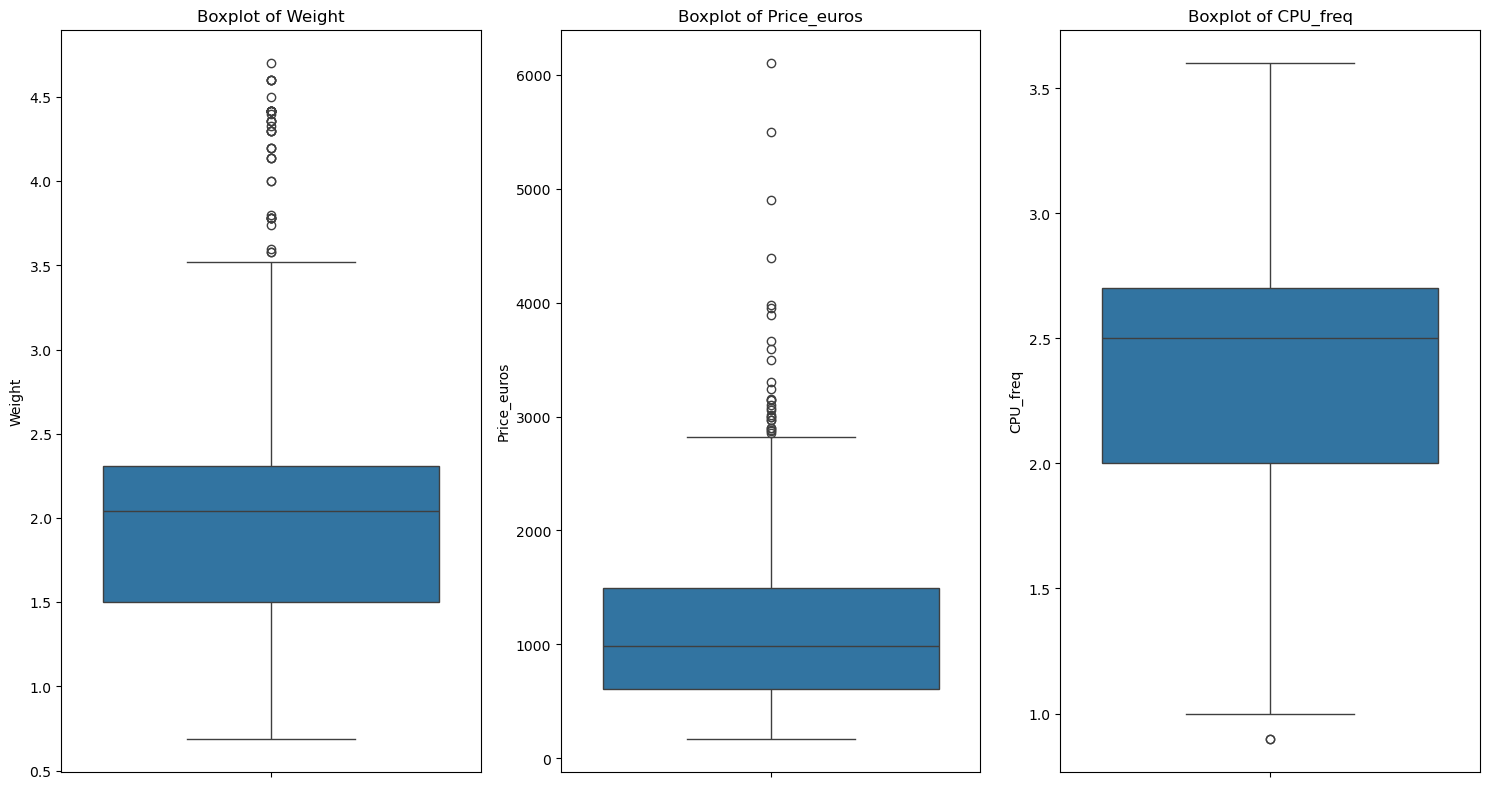

In [756]:
plt.figure(figsize=(15, 8))

for i, col in enumerate(cols, 1):
    plt.subplot(1, len(cols), i) 
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

Có thể thấy các giá trị phân bố hợp lí, một số laptop có khối lượng rất khủng, cũng như giá cũng rất khủng.

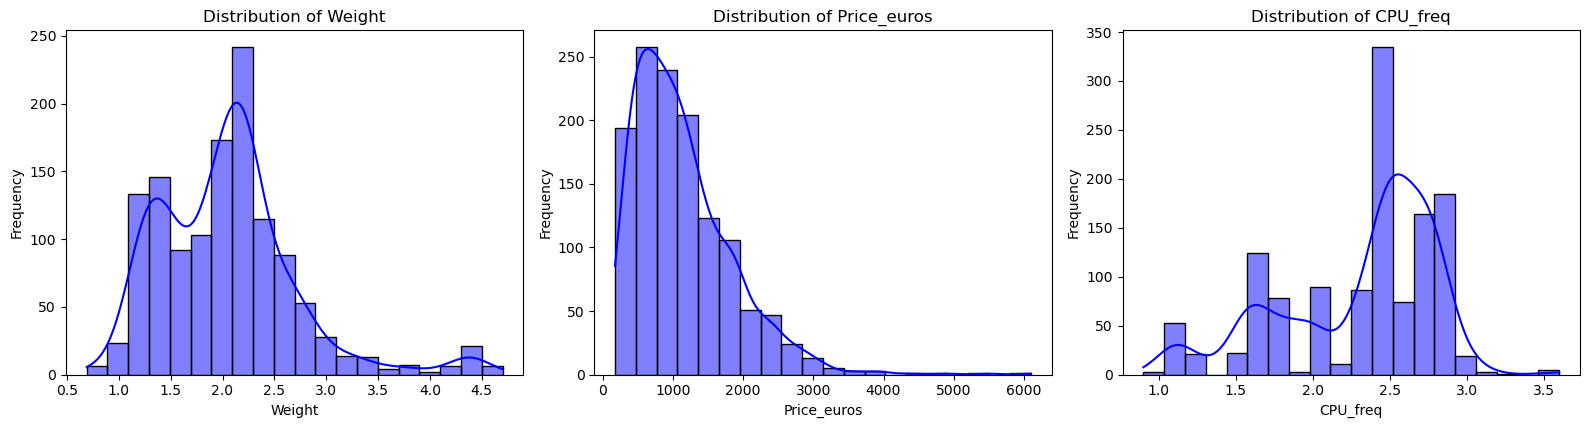

In [757]:
cols = ['Weight', 'Price_euros', 'CPU_freq']
# Set the size for the plots
plt.figure(figsize=(16, 12))

# Plot distributions for each column
for i, column in enumerate(cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True, bins=20, color='blue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

- Cột `Weight` là 1 phân phối có 2 đỉnh với 2 đại diện là laptop mỏng nhẹ, và laptop thông thường.
- Cột `Price_euro` có phân phối lệch phải chứng tỏ giá các sản phẩm tập trung ở mức vừa phải, và có 1 số ít các laptop giá trị rất khủng.
- Cột CPU_freq có phân phối không đều. Có thể các nhà sản xuất CPU thường tối ưu hóa các mẫu CPU để hoạt động ở một số dải xung nhịp cụ thể, ví dụ 2.0, 2.5,..


#### 3.1. Với các cột categorical, các giá trị phân bố như thế nào

Với các cột categorical, ta chia thành 2 phần là dữ liệu dạng số và dạng chuỗi.

Đối với dữ liệu dạng số

        Inches   Ram  PrimaryStorage  SecondaryStorage
count     1275  1275            1275              1275
unique       8     9              13                 6
top         15     8             256                 0
freq       655   613             508              1067


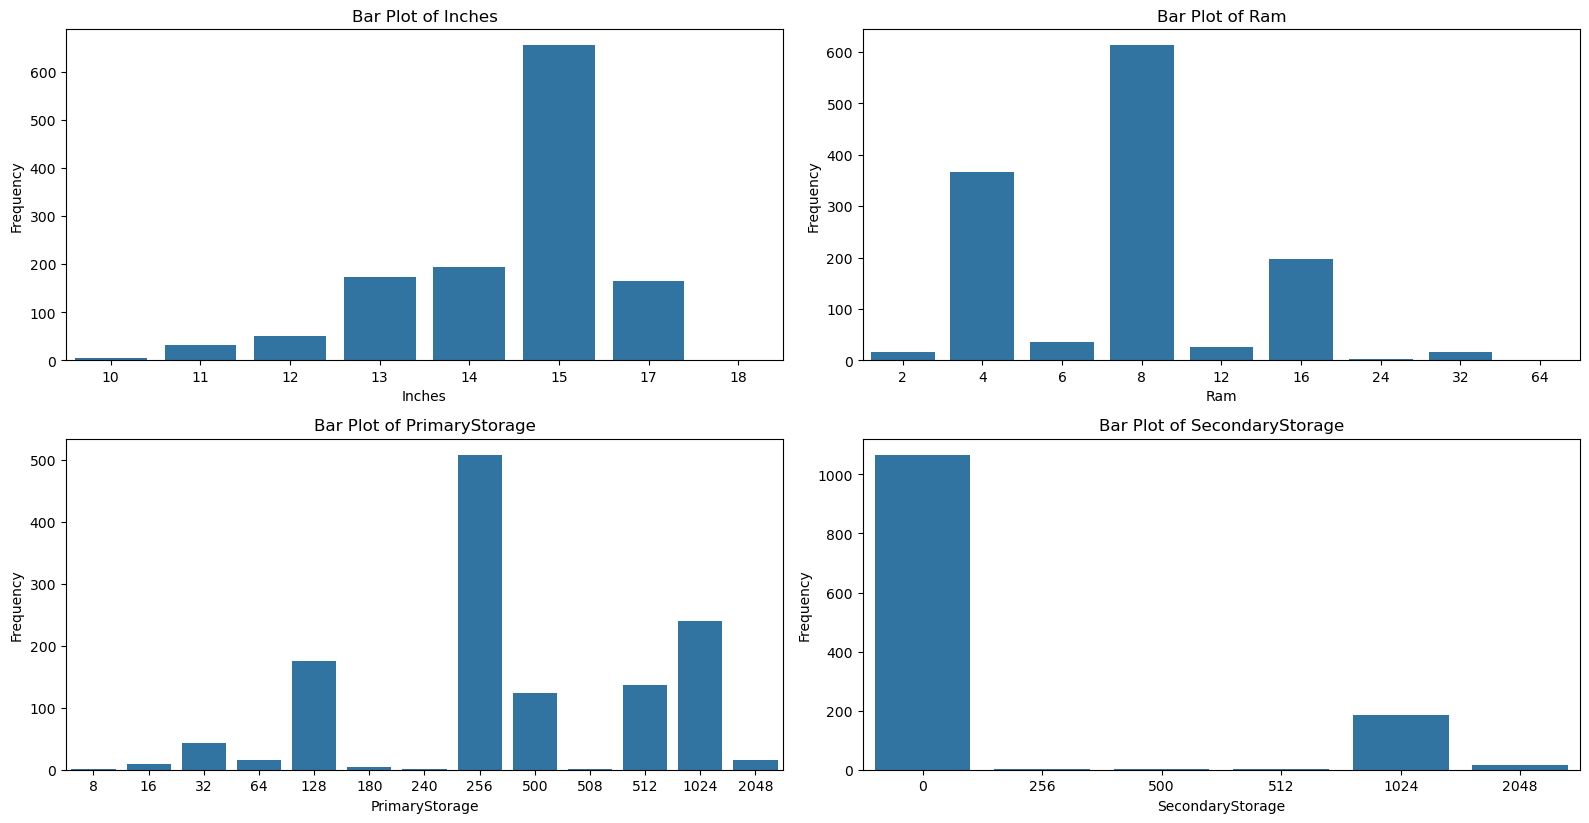

In [758]:
cols = ['Inches', 'Ram','PrimaryStorage', 'SecondaryStorage'] 

df[cols] = df[cols].astype('category')
print(df[cols].describe())

plt.figure(figsize=(16, 12))
for i, col in enumerate(cols, 1):
    plt.subplot((len(cols) + 2) // 2, 2, i)  # Tạo lưới 3 cột
    sns.barplot(
        x=df[col].value_counts().index,  
        y=df[col].value_counts().values, 
    )
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Điều chỉnh bố cục
plt.tight_layout()
plt.show()

Đối với dạng kiểu số ta có 4 cột:
- Kích thước màn hình: Laptop 15 inches có số lượng lớn nhất.(Nhỏ nhất là 10 inches, lớn nhất là 18 inches)
- Ram: Phổ biến nhất là 8GB.(Kích thước Ram nhỏ nhất là 2GB, lớn nhất là 64GB).
- Dung lượng của bộ nhớ chính tập trung nhiều vào 256GB RAM. Dữ liệu có 508GB có vẻ như bất thường nhưng sau khi kiểm tra thì 508 là kích thước của bộ nhớ Hybrid(lai giữa SSD và HDD). 
- Hấu hết các máy chỉ dùng 1 bộ nhớ chính.

Với kích thước bộ nhớ nhỏ như 16GB, 32GB thực tế vẫn có(sau khi tham khảo ở trên Internet). Nhưng kích thước bất thường là 8GB(SSD) quá nhỏ. Ta sẽ kiểm tra xem dữ liệu này có thực tế không.

In [759]:
df[df['PrimaryStorage'] == 8]

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
950,HP,ZBook Studio,Workstation,15,8,Windows 10,2.0,2249.0,Full HD,1920,...,No,Intel,2.7,Core i7 6820HQ,8,0,SSD,No,Nvidia,Quadro M1000M


Dòng dữ liệu này khá vô lí khi sử dụng Ram 8GB nhưng SSD chỉ có 8GB. Sau khi kiểm tra trên Internet thì thực tế không có trường hợp như vậy. Ta sẽ tiến hành loại bỏ dòng dữ liệu này.

In [760]:
df = df[df['PrimaryStorage'] != 8]

Đối với dữ liệu dạng chuỗi.

       Company  TypeName       OpSys   Screen Touchscreen IPSpanel  \
count     1274      1274        1274     1274        1274     1274   
unique      19         6           9        4           2        2   
top       Dell  Notebook  Windows 10  Full HD          No       No   
freq       291       707        1047      834        1086      918   

       RetinaDisplay CPU_company PrimaryStorageType SecondaryStorageType  \
count           1274        1274               1274                 1274   
unique             2           3                  4                    4   
top               No       Intel                SSD                   No   
freq            1257        1213                836                 1066   

       GPU_company  
count         1274  
unique           4  
top          Intel  
freq           704  


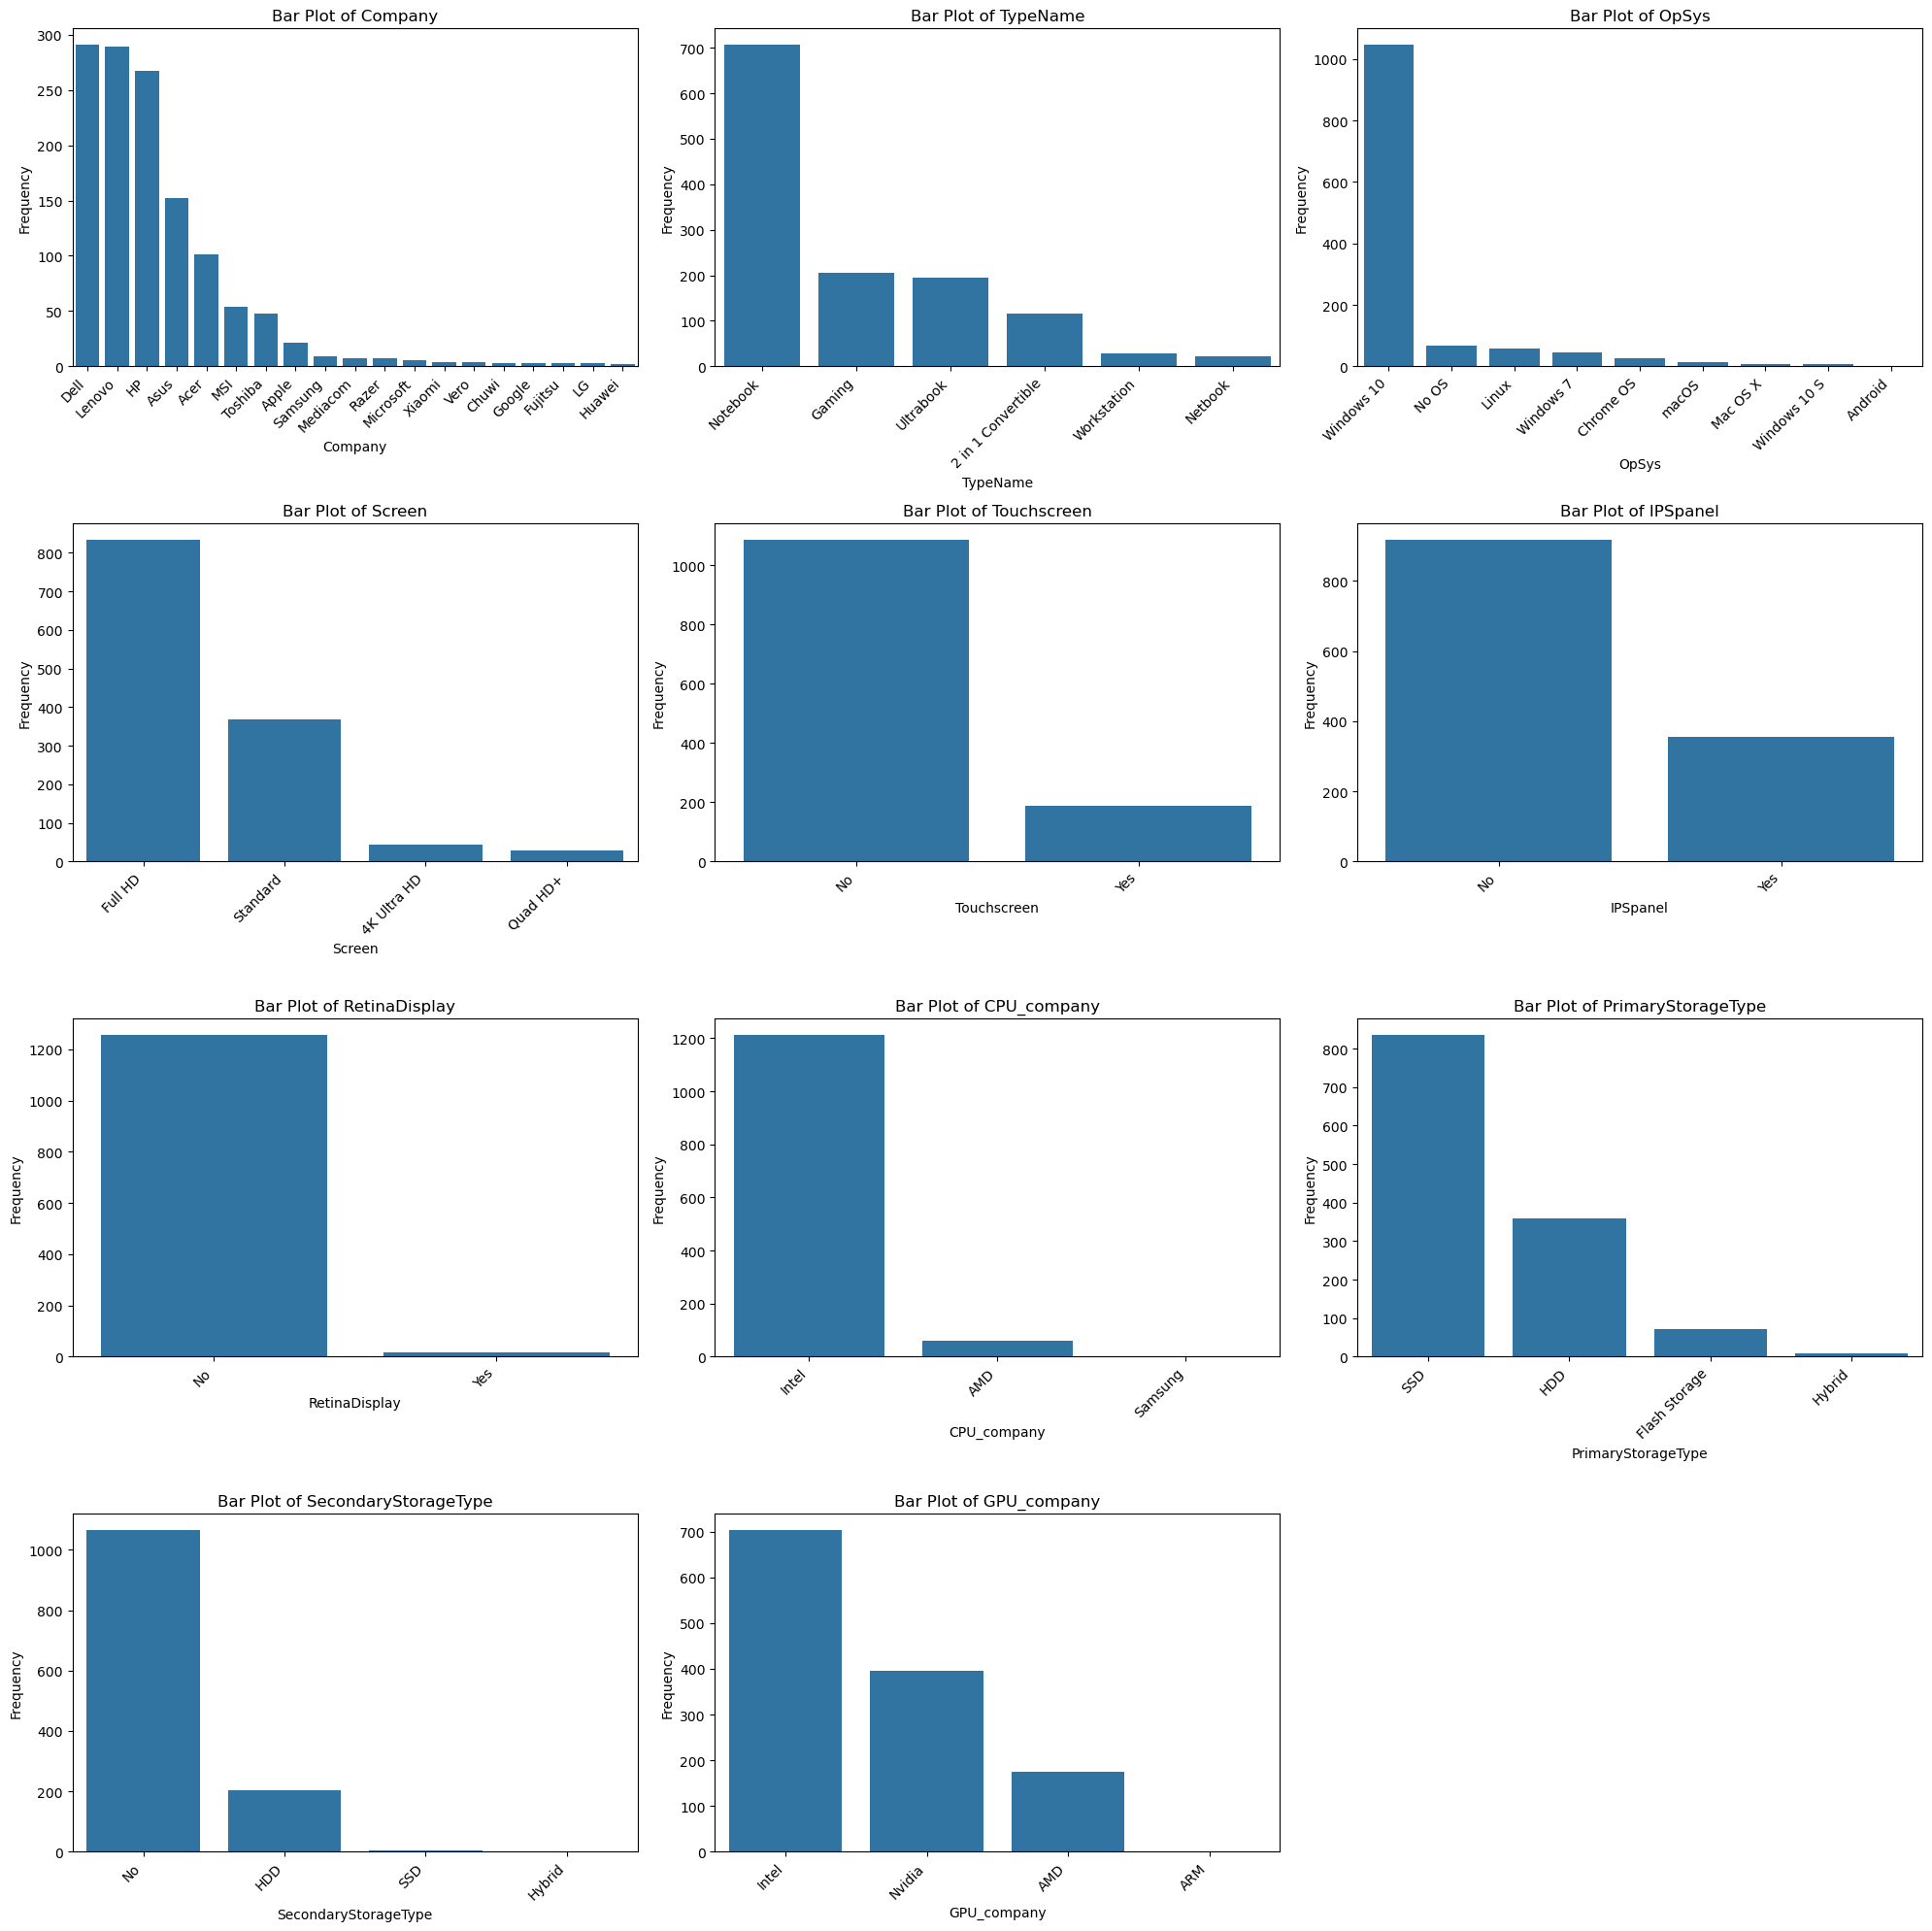

In [761]:
cols = ['Company', 'TypeName', 'OpSys', 'Screen',
        'Touchscreen', 'IPSpanel', 'RetinaDisplay', 'CPU_company', 
        'PrimaryStorageType', 'SecondaryStorageType', 'GPU_company'] 

print(df[cols].describe())

plt.figure(figsize=(20,20))
for i, col in enumerate(cols, 1):
    plt.subplot((len(cols) + 2) // 3, 3, i)  # Tạo lưới 3 cột
    value_counts = df[col].value_counts().sort_values(ascending=False)
    sns.barplot(
        x=value_counts.index,  
        y=value_counts.values, 
        # palette="coolwarm"
    )
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.xticks(rotation=45, ha="right")
    plt.ylabel('Frequency')

# Điều chỉnh bố cục
plt.tight_layout()
plt.show()

Có thể thấy dữ liệu các cột categorical phân bố hợp lí. Không có điều gì bất thường.

Tên của các sản phẩm, tên model cpu, model gpu đều rất nhiều nên sẽ chỉ hiển thị 10 trong số chúng.

       Product      CPU_model        GPU_model
count     1274           1274             1274
unique     618             93              110
top     XPS 13  Core i5 7200U  HD Graphics 620
freq        30            193              279


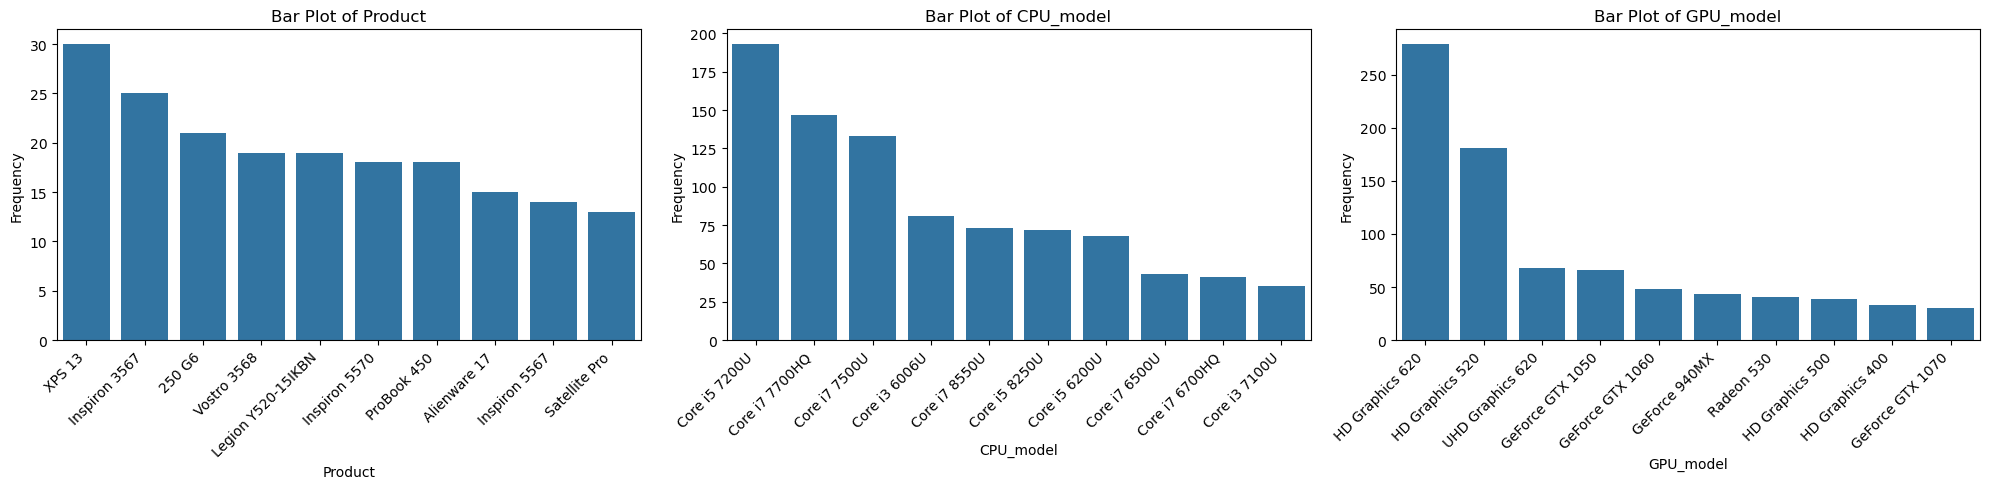

In [762]:
cols = ['Product', 'CPU_model', 'GPU_model'] 

print(df[cols].describe())

plt.figure(figsize=(20,5))
for i, col in enumerate(cols, 1):
    plt.subplot((len(cols) + 2) // 3, 3, i)  # Tạo lưới 3 cột
    sns.barplot(
        x=df[col].value_counts().index[:10],  # Lấy top 10 giá trị phổ biến
        y=df[col].value_counts().values[:10], 
        # palette="coolwarm"
    )
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.xticks(rotation=45, ha="right")
    plt.ylabel('Frequency')

# Điều chỉnh bố cục
plt.tight_layout()
plt.show()

Dữ liệu không còn gì bất thường.

### 3. Kết quả thu được

In [763]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1274 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Company               1274 non-null   object  
 1   Product               1274 non-null   object  
 2   TypeName              1274 non-null   object  
 3   Inches                1274 non-null   category
 4   Ram                   1274 non-null   category
 5   OpSys                 1274 non-null   object  
 6   Weight                1274 non-null   float64 
 7   Price_euros           1274 non-null   float64 
 8   Screen                1274 non-null   object  
 9   ScreenW               1274 non-null   int64   
 10  ScreenH               1274 non-null   int64   
 11  Touchscreen           1274 non-null   object  
 12  IPSpanel              1274 non-null   object  
 13  RetinaDisplay         1274 non-null   object  
 14  CPU_company           1274 non-null   object  
 15  CPU_

Ta có bộ dữ liệu với 1274 dòng, 23 cột.

Lưu kết quả vào file `laptop_price_cleaned.csv`

In [764]:
df.to_csv("./Dataset/laptop_price_cleaned.csv", index=False)